# Hackathon RIIAA 2021  -  JusticIA para los desaparecidos

Este notebook incluye las instrucciones y código para acceder a los datos recomendados para el evento.

El conjunto de datos se divide en tres:
* Fichas_manual: ~1k fotos de fichas provenientes de los ficheros del AGN por medio de Archivos de la Represión de las cuales contamos con transcripciones manuales de alta calidad.
* Fichas_auto: ~1k fotos de fichas provenientes de los ficheros del AGN por medio de Archivos de la Represión de las cuales contamos con transcripciones automáticas de calidad media.
* Expedientes: ~1k fotos de fijas de expedientes de mujeres embarazadas desaparecidas provenientes del AGN de las cuales no hay transcripciones.

Las imagenes se encuentran en [Datos - Hackathon JusticIA](https://drive.google.com/drive/folders/1VIu3JBV6-LlPbSLwQYLAw_N5PSh7cPgp?usp=sharing) y la liste de archivos con las transcripciones en [Transcripciones - Hackathon JusticIA]().

Es posible acceder a mas imagenes sin transcripción en la [Biblioteca integra de Archivos de la Represión](https://archivo.archivosdelarepresion.org/) y a documentos sobre el tema en el [Corpus Público de la CNB]().

## 1. Agregar y acceder a la carpeta compartida.

a) Accede a la carpeta donde se encuentran los datos: [Datos - Hackathon JusticIA](https://drive.google.com/drive/folders/1VIu3JBV6-LlPbSLwQYLAw_N5PSh7cPgp?usp=sharing)  
b) Agrega un link a tu Google Drive usando la opción `Add Shortcut to Drive` esto agregará la carpeta a tu directorio raíz.
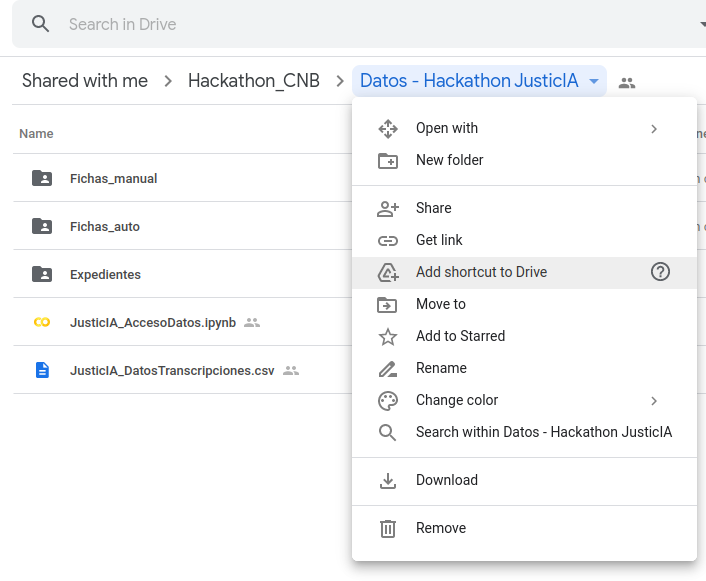

c) Ejecuta las siguientes lineas de código. Haz click en el link azul y sigue las instrucciones de autentificación, no olvides copiar el token de acceso, pegarlas en la caja que aparece abajo y dar Enter. Si has ejecutado correctamente este código apareceran todas las carpetas y archivos en tu Drive incluyendo `Datos - Hackathon JusticIA`.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Leer la lista de archivos

EL conjunto de datos incluye un csv `JusticIA_DatosTranscripciones.csv` con los archivos, el texto transcrito y varios metadatos.

Nota: si cambias el lugar donde se encuentra el link a la carpeta de los datos será necesario que actualices los paths.

In [2]:
import pandas as pd

in_dir = 'drive/MyDrive/Datos - Hackathon JusticIA/'
in_file = 'JusticIA_DatosTranscripciones.csv'

df = pd.read_csv(in_dir+in_file)
df.tail()

,Fuente,Conjunto,NombreArchivo,Texto,MetodoTexto
2954,Expedientes AGN,Expedientes,AGN_DFS_TARJETAS_Morales_Lopez_Delia_Cirila_pg...,NaN,NaN
2955,Expedientes AGN,Expedientes,AGN_DFS_TARJETAS_Morales_Lopez_Delia_Cirila_pg...,NaN,NaN
2956,Expedientes AGN,Expedientes,AGN_DFS_TARJETAS_Morales_Lopez_Delia_Cirila_pg...,NaN,NaN
2957,Expedientes AGN,Expedientes,AGN_DFS_TARJETAS_Morales_Lopez_Delia_Cirila_pg...,NaN,NaN
2958,Expedientes AGN,Expedientes,AGN_DFS_TARJETAS_Morales_Lopez_Delia_Cirila_pg...,NaN,NaN


# 3. Ejecutar una función en todos los archivos

Una opción es recorrer las carpetas de archivos usando glob. En este caso imprimiremos el ancho y largo de 20 archivos al azar.

In [3]:
import PIL

from glob import glob
from random import sample

def get_width_and_height(file_name):
    image = PIL.Image.open(file_name)
    return image.size
    
files = glob(in_dir+'/*/*.*')
files = sample(files, 20)

for file_name in files:
    width, height = get_width_and_height(file_name)
    print(width, height, file_name)

3456 2592 drive/MyDrive/Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-228.jpg
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_UAG_72-02-29_a_73-05-11_UAG,_fichas-151-.JPG
3456 2592 drive/MyDrive/Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.48_De_los_Rios_Merino_Alicia_pg-009.jpg
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_UAG_75-07-03_a_76-04-05_UAG,_fichas-105-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_Represores_Roman_Roman_Francisco_ROMAN_ROMAN_Francisco_.LIC-11-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_ACNR_militantes_Ramirez_Huerta_Juan_D_IMG_7669.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_VARP_VARP_6_IMG_5785.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_UAG_82-02-17_a_82-03-18_UAG,_fichas-87-.JPG
1920 1080 drive/MyDrive/Datos - Hackathon JusticIA/Ex

Es posible usar los datos en el archivo csv para reconstruir los paths. La columna `Conjunto` corresponde a la carpeta y `NombreArchivo` al archivo. Esto permite filtrar los archivos usando pandas, por ejemplo, calculemos el tamaño de las imagenes que tienen más de 2000 caracteres.

In [4]:
df_long = df[df['Texto'].str.len()>2000]

for dir, fil in zip(df_long['Conjunto'].values, df_long['NombreArchivo'].values):
    file_name = in_dir + dir + '/' + fil
    width, height = get_width_and_height(file_name)
    print(width, height, file_name)


3456 4608 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_UPCEG,_Version_Publica-59-04-09_a_85-12-04-,_Guerrero_UPCEG,_2_de_4-67-04-21_a_69-09-18-_2_de_4-67-04-21_a_69-09-18-33-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Corral_Garcia_Salvador,_Version_Publica_Corral_Garcia_Salvador,_Version_Publica-147-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Detenidos_Desaparecidos_Arenas_Bautista_Marcelo_74-08-09,_ARENAS_BAUTISTA,_Marcelo-10-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Esparza_Flores_Jose_Luis_Esparza_Flores_Jose_Luis-23-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Esparza_Flores_Jose_Luis_Esparza_Flores_Jose_Luis-26-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Frente_Armado_del_Pueblo_Fichas_Frente_Armado_del_Pueblo,_fichas-66-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_G

## ¡Gracias!